A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [5]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [6]:
import seaborn as sns

In [7]:
# Limpiamos el dataframe
df = df.set_index('Team')

In [8]:
# Vemos el tipo de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Croatia to Ukraine
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Goals                       16 non-null     int64  
 1   Shots on target             16 non-null     int64  
 2   Shots off target            16 non-null     int64  
 3   Shooting Accuracy           16 non-null     object 
 4   % Goals-to-shots            16 non-null     object 
 5   Total shots (inc. Blocked)  16 non-null     int64  
 6   Hit Woodwork                16 non-null     int64  
 7   Penalty goals               16 non-null     int64  
 8   Penalties not scored        16 non-null     int64  
 9   Headed goals                16 non-null     int64  
 10  Passes                      16 non-null     int64  
 11  Passes completed            16 non-null     int64  
 12  Passing Accuracy            16 non-null     object 
 13  Touches                     16 

In [9]:
import numpy as np
for y in df.columns:
    print(df[y].dtype)
    if df[y].dtype != np.int64 and df[y].dtype != np.float64:
        df[y] = df[y].str.replace('%', '').astype(float)

int64
int64
int64
object
object
int64
int64
int64
int64
int64
int64
int64
object
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
object
int64
int64
int64
int64
int64
int64
int64
int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Croatia to Ukraine
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Goals                       16 non-null     int64  
 1   Shots on target             16 non-null     int64  
 2   Shots off target            16 non-null     int64  
 3   Shooting Accuracy           16 non-null     float64
 4   % Goals-to-shots            16 non-null     float64
 5   Total shots (inc. Blocked)  16 non-null     int64  
 6   Hit Woodwork                16 non-null     int64  
 7   Penalty goals               16 non-null     int64  
 8   Penalties not scored        16 non-null     int64  
 9   Headed goals                16 non-null     int64  
 10  Passes                      16 non-null     int64  
 11  Passes completed            16 non-null     int64  
 12  Passing Accuracy            16 non-null     float64
 13  Touches                     16 

<AxesSubplot:>

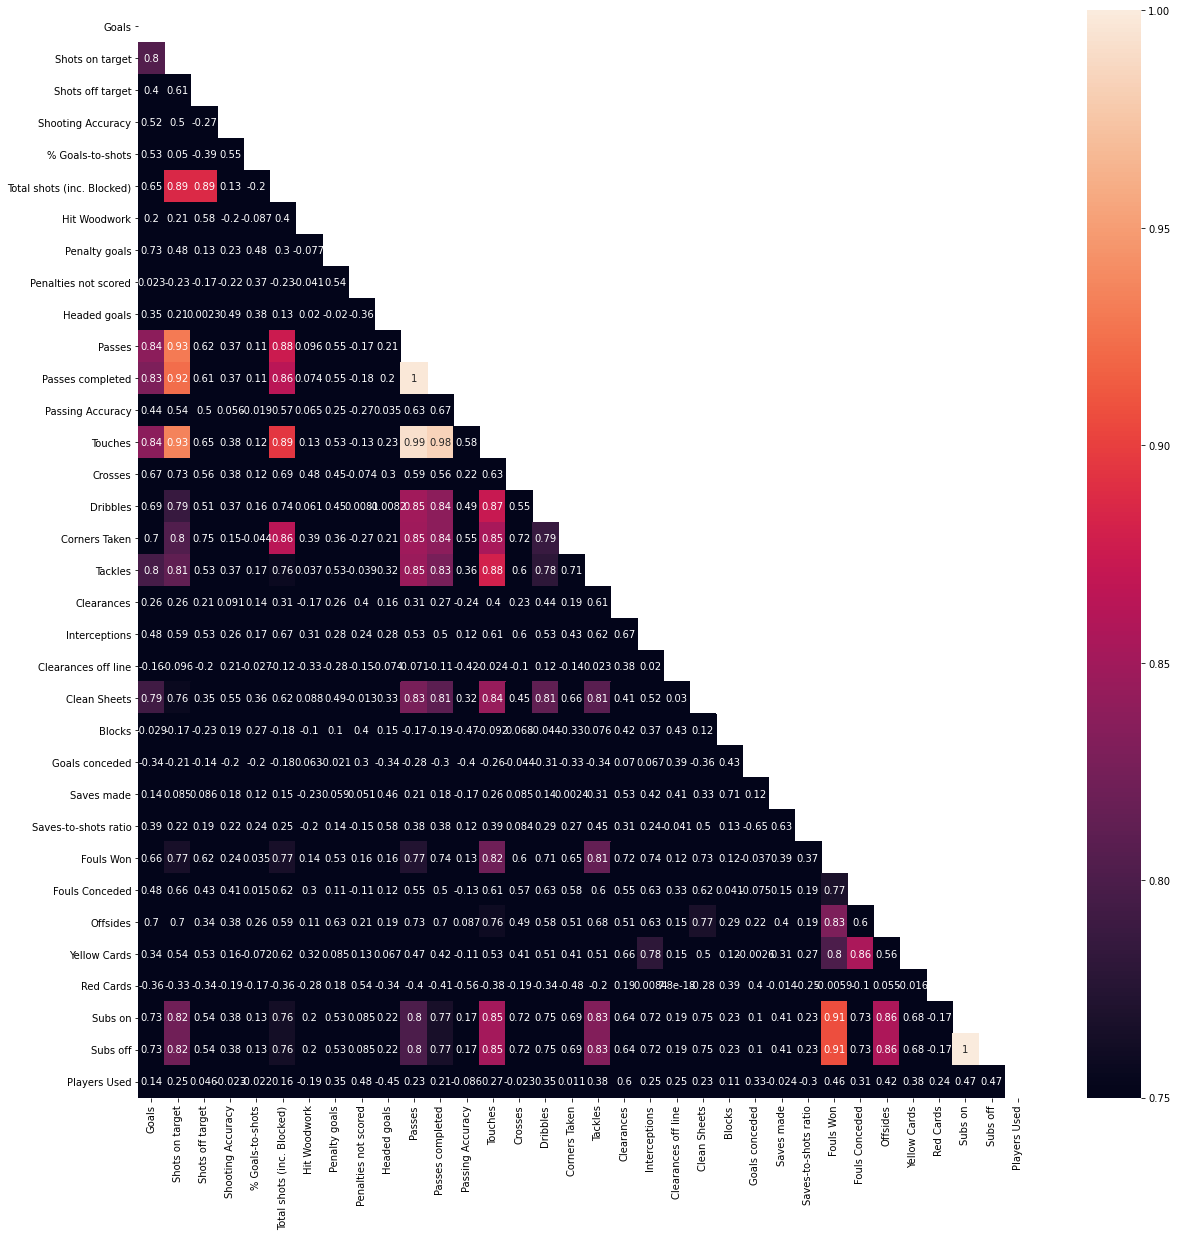

In [11]:
import matplotlib.pyplot as plt

corr = df.corr()
matrix = np.triu(df.corr())

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=corr, annot=True, xticklabels=1, yticklabels=1, mask=matrix, vmin=0.75, vmax=1,)

### ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [13]:
X = np.array(df["Shooting Accuracy"]).reshape(-1,1)
y = np.array(df['Goals']).reshape(-1,1)

Score: 27.16593767213703


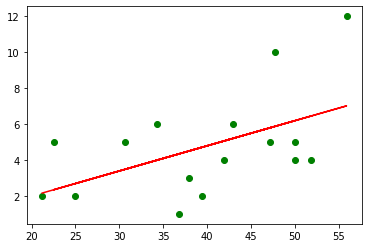

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Score:", lin_reg.score(X, y) * 100)

plt.plot(X, lin_reg.predict(X), color='red')
plt.scatter(X, y, color='g')

Score: 44.43383420925081


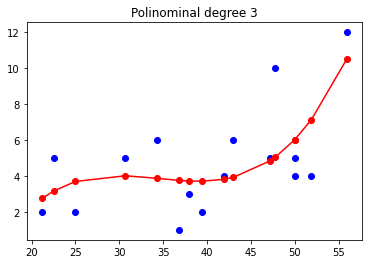

In [21]:
from sklearn.metrics import r2_score

degree = 3

polinominal_model = PolynomialFeatures(3)
X_poly = polinominal_model.fit_transform(X, y)

lin_reg.fit(X_poly, y)

y_pred = lin_reg.predict(X_poly)

print("Score:", r2_score(y, y_pred)*100)



X_train_to_show, y_train_to_show = zip(*sorted(zip(X, y)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')

X_train_to_show, y_pred = zip(*sorted(zip(X, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Polinominal degree " + str(degree))
plt.show()

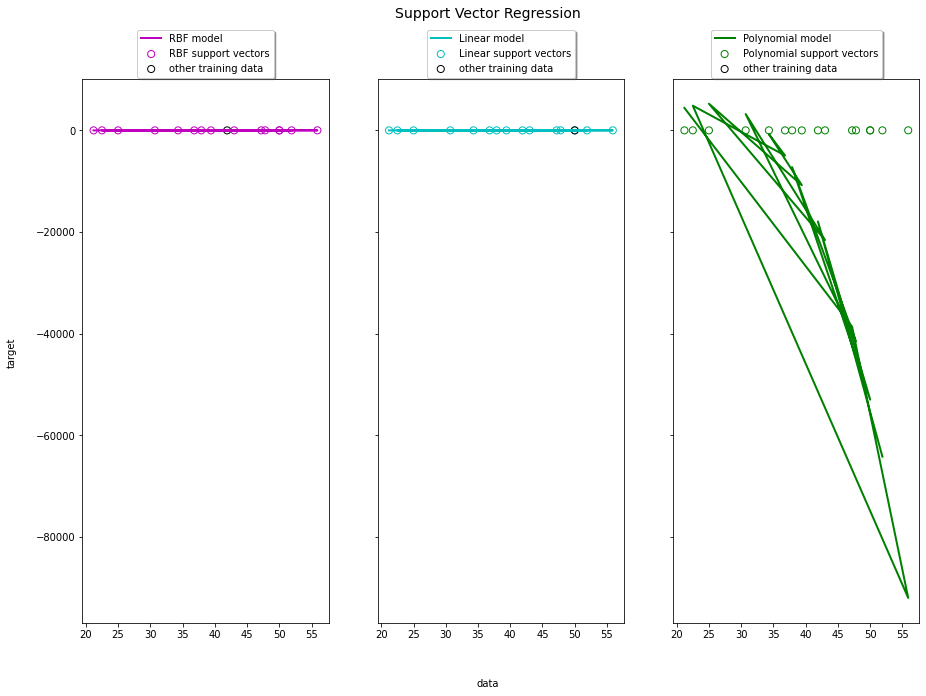

In [12]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    model = svr.fit(X, y)
    y_prediction = model.predict(X)
    
    axes[ix].plot(X, y_prediction, color=model_color[ix], lw=lw, 
    label='{} model'.format(kernel_label[ix]))
   
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### 3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import pickle
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [14]:
df.columns

Index(['Goals', 'Shots on target', 'Shots off target', 'Shooting Accuracy',
       '% Goals-to-shots', 'Total shots (inc. Blocked)', 'Hit Woodwork',
       'Penalty goals', 'Penalties not scored', 'Headed goals', 'Passes',
       'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [15]:
X = np.array(df[["% Goals-to-shots", "Total shots (inc. Blocked)","Corners Taken", "Passes", "Dribbles"]])
y = np.array(df['Goals'])

In [16]:
X_new = pd.DataFrame({'% Goals-to-shots': 40, 'Total shots (inc. Blocked)': 102, 'Corners Taken': 5, 'Passes': 82, "Dribbles":23}, index=[0])

X_new

,% Goals-to-shots,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles
0,40,102,5,82,23


In [17]:
model = LogisticRegression(n_jobs=-1)

model.fit(X, y)

score = model.score(X,y)*100
score

75.0

In [18]:
y_pred = model.predict(X_new)
y_pred

array([5], dtype=int64)

In [19]:
C = 100
gamma = 10

clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)

y_pred = clf.predict(X_new)
y_pred

array([5], dtype=int64)

In [35]:
model = RandomForestClassifier(warm_start=True)
# evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=2)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print(n_scores)

k_fold = KFold(n_splits=4)
model.fit(X, y)

y_pred = model.predict(X_new)
y_pred

array([5], dtype=int64)